# 11. Regularization 적용해 보기
* [딥러닝 용어 정리, L1 Regularization, L2 Regularization 의 이해, 용도와 차이 설명](https://light-tree.tistory.com/125)
---
![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile4.uf.tistory.com%2Fimage%2F99BED3425CE4B1341814F6)

## Hyper Parameter 설정

In [1]:
batch_size = 10
num_classes = 3
epochs = 200

## 라이브러리 및 함수설정

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import optimizers

import matplotlib.pyplot as plt
def hist_view(hist):
  print('## training loss and acc ##')
  fig, loss_ax = plt.subplots()
  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='center')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='center right')

  plt.show()

## 데이터 로드

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()
# x=iris.data
import pandas as pd
![ ! -f  iris0.csv ]&&wget http://j.finfra.com/_file/iris0.csv
iris=pd.read_csv("iris0.csv")



--2021-08-09 05:46:07--  http://j.finfra.com/_file/iris0.csv
Resolving j.finfra.com (j.finfra.com)... 211.252.85.187
Connecting to j.finfra.com (j.finfra.com)|211.252.85.187|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3730 (3.6K) [text/csv]
Saving to: ‘iris0.csv’

iris0.csv           100%[===================>]   3.64K  --.-KB/s    in 0s      

2021-08-09 05:46:08 (347 MB/s) - ‘iris0.csv’ saved [3730/3730]



## input data 와 target data 설정

In [4]:
x=iris.iloc[:,0:4].values
y_text=iris.iloc[:,4:5]

sets=y_text.drop_duplicates()["Species"].tolist()
encoder={k:v for v,k in enumerate(sets)}
y_num=[ encoder[i] for i in y_text["Species"].tolist() ]




## 훈련 데이터와 평가 데이터 분리

In [5]:
# iris.target → y
y= keras.utils.to_categorical(y_num, num_classes)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((105, 4), (45, 4), (105, 3), (45, 3))

## Model 에 Regularization 적용

In [6]:
from keras.layers import BatchNormalization, Dropout
from keras import regularizers

l2=regularizers.l2(l2=0.01)

model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(4,)))
model.add(Dense(4, activation='relu',kernel_regularizer=l2))

model.add(Dense(4, activation='relu',kernel_regularizer='l1'))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

adam=optimizers.Adam(0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

# batch_size,epochs
spe=int(x_train.shape[0]/batch_size )
hist=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          steps_per_epoch=spe,
          validation_data=(x_test, y_test))

# help(model.fit)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 15        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
10/10 [==============================] - 3s 23ms/step - loss: 1.2265 - accuracy: 0.2900 - val_loss: 1.1728 - val_accuracy: 0.4000
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 1.1892 - accuracy: 0.3158 - val_loss: 1.159

## 결과 확인

## training loss and acc ##


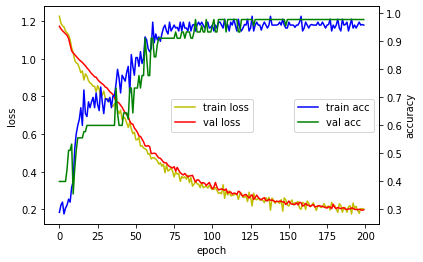

Test loss: 0.1976756602525711
Test accuracy: 0.9777777791023254


In [7]:
hist_view(hist)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


In [8]:
model.layers[2].weights

[<tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 5.9066963e-01,  4.8696485e-01,  2.2225671e-01, -5.1473959e-05],
        [ 1.4420216e+00, -5.8669075e-02,  8.7331343e-01, -2.3807836e-05],
        [-2.4134756e-04,  4.6836980e-05,  5.7182428e-05, -3.5576231e-05],
        [-2.0427890e-01,  8.9981747e-01, -6.3905489e-01, -1.9825875e-06]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(4,) dtype=float32, numpy=array([-0.14761232,  0.74518454, -0.34382242, -0.02062097], dtype=float32)>]

In [9]:
decoder = {k:v for k,v in enumerate( sets )}
decoder

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [10]:
r=np.argmax(model.predict(x_test[:10,:]), axis=-1)
[decoder[i] for i in r]

['virginica',
 'versicolor',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor']

# 시각화도 하고 만든 모델도 저장하고 만든 모델에 대한 평가도 하고, 하고 싶은 것이 많지만, 다음 장에서...==^^==